In [527]:
import torch
import matplotlib.pyplot as plt
from torch.distributions.multivariate_normal import MultivariateNormal
from functools import partial
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [334]:
%matplotlib inline

In [335]:
torch.manual_seed(42)
torch.set_printoptions(linewidth=140, sci_mode=False, precision=3)

In [336]:
num_clusters = 6
num_samples = 250

In [337]:
centroids = torch.randn(num_clusters, 2) * 70 - 35

In [338]:
centroids.max(), centroids.min(), centroids.std()

(tensor(119.574), tensor(-113.600), tensor(56.453))

In [339]:
torch.diag(torch.tensor([5., 5.]))

tensor([[5., 0.],
        [0., 5.]])

In [340]:
m = MultivariateNormal(torch.tensor([0.0, 0.]), torch.diag(torch.tensor([10., 10.])));m

MultivariateNormal(loc: torch.Size([2]), covariance_matrix: torch.Size([2, 2]))

In [341]:
s = m.sample((num_samples,));s

tensor([[     1.125,     -2.171],
        [    -1.560,      0.764],
        [    -3.513,      0.289],
        [    -7.327,     -0.686],
        [    -0.979,     -1.251],
        [     2.541,     -1.966],
        [    -1.872,     -0.199],
        [    -2.620,      1.046],
        [     0.110,      1.015],
        [     4.976,     -2.674],
        [     4.150,      2.173],
        [    -3.444,     -1.124],
        [    -4.484,      2.834],
        [     0.158,      7.168],
        [     3.728,     -1.374],
        [    -4.384,     -4.067],
        [    -2.647,     -2.917],
        [     5.728,      0.508],
        [     1.161,      0.555],
        [     4.380,     -1.410],
        [    -3.802,      2.238],
        [    -3.402,      1.694],
        [     3.717,      1.775],
        [    -1.432,     -2.441],
        [     0.460,      0.731],
        [     0.027,     -0.450],
        [     0.623,     -3.618],
        [     1.070,      5.373],
        [     8.899,      1.138],
        [    -

In [342]:
s.shape

torch.Size([250, 2])

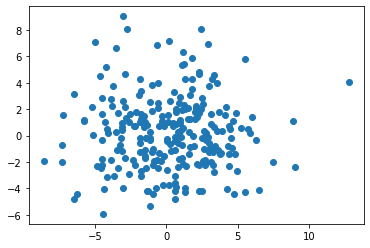

In [343]:
plt.scatter(s.T[0], s.T[1])

In [344]:
torch.corrcoef(s.T) 

tensor([[1.000, 0.005],
        [0.005, 1.000]])

In [345]:
torch.cov(s.T) 

tensor([[10.514,  0.049],
        [ 0.049,  7.634]])

In [346]:
# MultivariateNormal?

In [347]:
def samples(c):
    return MultivariateNormal(c, torch.diag(torch.tensor([10., 10.]))).sample((num_samples,))

In [348]:
slices = [samples(c) for c in centroids]

In [349]:
data = torch.cat(slices);data.shape

torch.Size([1500, 2])

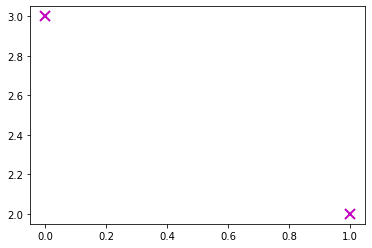

In [350]:
_, ax = plt.subplots()
ax.plot(1,2,3, markersize=10, marker='x', color='m', mew=2)


In [351]:
centroids[0]

tensor([-11.432, -25.983])

In [352]:
def t(*arg):
    print(arg)

In [353]:
t(*centroids[0])

(tensor(-11.432), tensor(-25.983))


In [530]:
def plot_data(centroids, data, num_samples, ax=None):
    if not ax:_, ax = plt.subplots(figsize=(20, 8))
    for i, centroid in enumerate(centroids):
        sample = data[i*num_samples:(i+1)*num_samples]
        ax.scatter(sample[:,0], sample[:,1], s=1)
        ax.plot(*centroid, marker='x', color='k', markersize=10, mew=5)        
        ax.plot(*centroid, marker='x', color='m', markersize=5, mew=2)

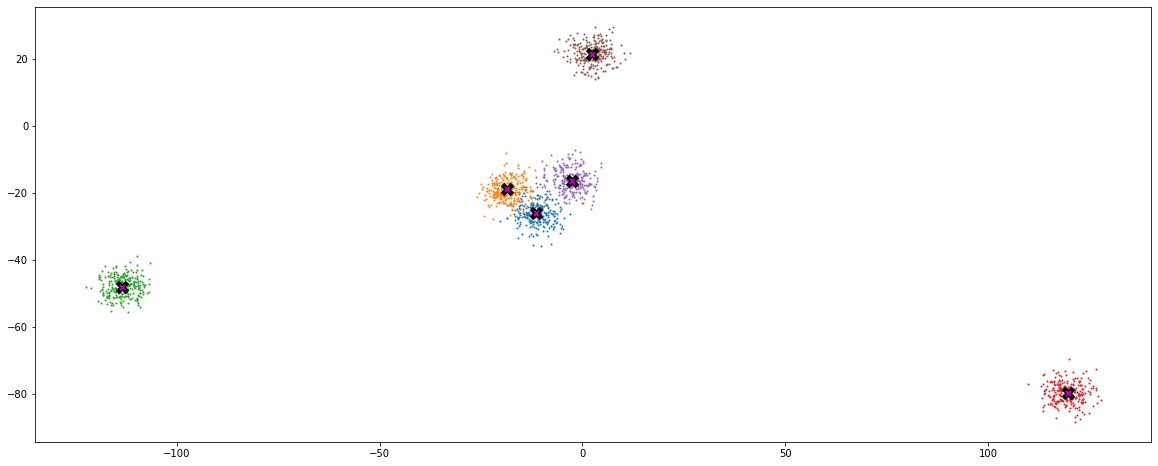

In [355]:
plot_data(centroids, data, num_samples)

In [359]:
x = torch.arange(0, 40);x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39])

In [360]:
y = torch.randn(40);y

tensor([-2.076, -0.091, -0.599, -0.251,  0.779, -0.319,  0.018, -0.902,  0.772, -1.958,  1.624, -1.904, -1.236, -1.453, -0.394,  0.401,
         1.141,  0.416,  2.026, -1.013,  0.912, -0.289, -2.560, -0.431, -1.330, -0.712,  1.006,  0.724, -0.720,  0.645, -1.018, -1.102,
         0.103,  0.022, -0.616, -0.505,  0.353,  0.413, -0.925, -1.502])

<BarContainer object of 40 artists>

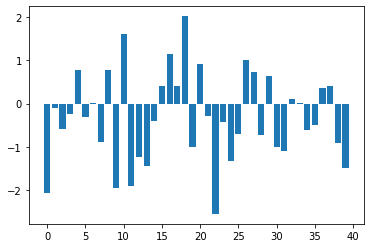

In [364]:
plt.bar(x, y)

In [380]:
x = torch.linspace(-6, 6, 1000);x[:5]

tensor([-6.000, -5.988, -5.976, -5.964, -5.952])

In [387]:
y = (1 / 1 * torch.sqrt(2*torch.tensor(torch.pi)))* torch.exp(-x**2/(2*1));y[:5]

tensor([    0.000,     0.000,     0.000,     0.000,     0.000])

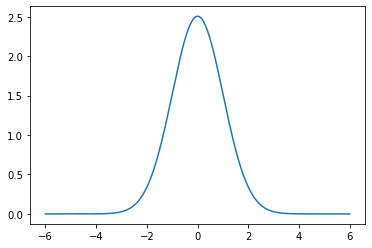

In [388]:
plt.plot(x, y)

In [409]:
x = torch.linspace(0, 1, 100);x[:5]

tensor([0.000, 0.010, 0.020, 0.030, 0.040])

In [430]:
y = torch.sin(2*torch.pi*x);y[:5] 

tensor([0.000, 0.063, 0.127, 0.189, 0.251])

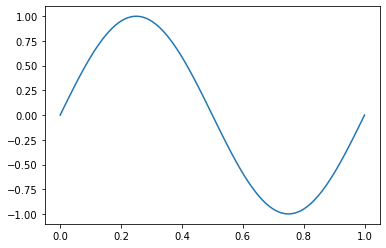

In [431]:
plt.plot(x, y)

In [432]:
def gaussian_kernel(x, mu, sigma):
    return torch.exp(-(x - mu)**2 / (2 * sigma**2)) / (sigma * torch.sqrt(2 * torch.tensor(torch.pi)))

In [433]:
gaussian_kernel(x, x[1], 1)

tensor([0.399, 0.399, 0.399, 0.399, 0.399, 0.399, 0.398, 0.398, 0.398, 0.398, 0.397, 0.397, 0.396, 0.396, 0.396, 0.395, 0.394, 0.394, 0.393,
        0.392, 0.392, 0.391, 0.390, 0.389, 0.388, 0.387, 0.386, 0.385, 0.384, 0.383, 0.382, 0.381, 0.380, 0.379, 0.377, 0.376, 0.375, 0.373,
        0.372, 0.371, 0.369, 0.368, 0.366, 0.365, 0.363, 0.361, 0.360, 0.358, 0.356, 0.355, 0.353, 0.351, 0.349, 0.348, 0.346, 0.344, 0.342,
        0.340, 0.338, 0.336, 0.334, 0.332, 0.330, 0.328, 0.326, 0.324, 0.322, 0.319, 0.317, 0.315, 0.313, 0.311, 0.308, 0.306, 0.304, 0.302,
        0.299, 0.297, 0.295, 0.292, 0.290, 0.288, 0.285, 0.283, 0.281, 0.278, 0.276, 0.274, 0.271, 0.269, 0.266, 0.264, 0.261, 0.259, 0.257,
        0.254, 0.252, 0.249, 0.247, 0.244])

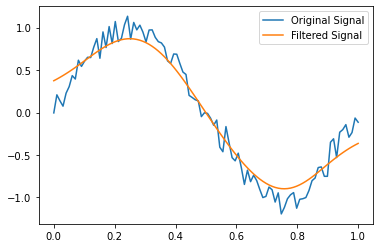

In [444]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a noisy signal
t = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * t) + np.random.normal(0, 0.1, 100)

# Define the Gaussian kernel
def gaussian_kernel(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

# Filter the signal using the Gaussian kernel
filtered_y = np.zeros_like(y)
window_size = 0.5 # set the width of the kernel
for i in range(len(t)):
    kernel = gaussian_kernel(t, t[i], window_size/6) # use a sigma of 1/6th of the kernel width
    kernel /= np.sum(kernel) # normalize the kernel
    filtered_y[i] = np.sum(kernel * y)

# Plot the original and filtered signals
plt.plot(t, y, label='Original Signal')
plt.plot(t, filtered_y, label='Filtered Signal')
plt.legend()
plt.show()


In [440]:
def gaussian_kernel(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))


In [442]:
gaussian_kernel(t, t[3], 0.6)

array([0.66405634, 0.66452702, 0.66480958, 0.6649038 , 0.66480958,
       0.66452702, 0.66405634, 0.66339794, 0.6625524 , 0.66152042,
       0.66030288, 0.65890081, 0.65731539, 0.65554797, 0.65360003,
       0.65147322, 0.64916931, 0.64669025, 0.64403809, 0.64121505,
       0.63822348, 0.63506585, 0.63174476, 0.62826296, 0.6246233 ,
       0.62082874, 0.61688237, 0.61278739, 0.6085471 , 0.60416489,
       0.59964426, 0.59498881, 0.5902022 , 0.58528819, 0.58025062,
       0.5750934 , 0.56982049, 0.56443593, 0.55894382, 0.5533483 ,
       0.54765356, 0.54186382, 0.53598337, 0.5300165 , 0.52396753,
       0.51784081, 0.5116407 , 0.50537157, 0.49903781, 0.49264377,
       0.48619385, 0.4796924 , 0.47314378, 0.4665523 , 0.45992229,
       0.45325801, 0.44656371, 0.43984361, 0.43310187, 0.42634261,
       0.41956991, 0.41278779, 0.40600022, 0.3992111 , 0.39242427,
       0.3856435 , 0.37887251, 0.37211492, 0.36537429, 0.3586541 ,
       0.35195775, 0.34528855, 0.33864973, 0.33204443, 0.32547

In [492]:
def gaussians(d, bw):
    return torch.exp(-0.5*((d/bw))**2) / (bw*torch.sqrt(2*torch.tensor(torch.pi)))

In [461]:
def plot_func(f):
    x = torch.linspace(0, 10, 100)
    plt.plot(x, f(x))

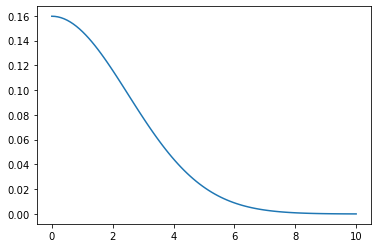

In [462]:
plot_func(partial(gaussians, bw=2.5))

In [463]:
def tri(d, i):
    return (-d+i).clamp_min(0)/i

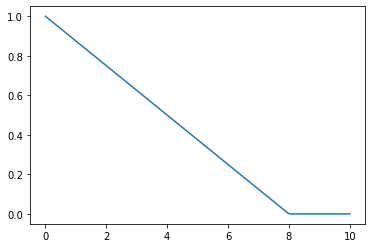

In [464]:
plot_func(partial(tri, i=8))

In [465]:
X = data.clone()

In [466]:
x = X[0]

In [467]:
x

tensor([ -9.712, -27.632])

In [470]:
X.shape, x.shape

(torch.Size([1500, 2]), torch.Size([2]))

In [475]:
x[None].shape

torch.Size([1, 2])

In [481]:
(x[None] - X)[:8]

tensor([[ 0.000,  0.000],
        [ 4.115, -1.410],
        [ 7.215, -1.252],
        [ 6.039, -5.165],
        [ 2.910, -4.771],
        [-0.309,  2.561],
        [-4.627,  2.314],
        [-1.818, -7.256]])

In [483]:
x - X

tensor([[  0.000,   0.000],
        [  4.115,  -1.410],
        [  7.215,  -1.252],
        ...,
        [ -7.431, -52.153],
        [ -7.549, -53.312],
        [-10.730, -50.880]])

In [491]:
dist = ((x-X)**2).sum(1).sqrt();dist

tensor([ 0.000,  4.350,  7.323,  ..., 52.680, 53.844, 51.999])

In [499]:
weight = gaussians(dist, 2.5)

In [512]:
(weight[:,None] * X).sum(0) / weight.sum()

tensor([-10.287, -27.002])

In [514]:
weight.sum()

tensor(13.593)

In [522]:
def one_update(X):
    for i, x in enumerate(X):
        dist = ((x-X)**2).sum(1).sqrt()
#         weight = gaussians(dist, 2.5)
        weight = tri(dist, 8)
        X[i] = (weight[:,None]*X).sum(0)/ weight.sum()

In [523]:
def mean_shift(data):
    X = data.clone()
    for i in range(5):
        one_update(X)
    return X

In [524]:
%time X = mean_shift(data)

CPU times: user 669 ms, sys: 8.52 ms, total: 677 ms
Wall time: 682 ms


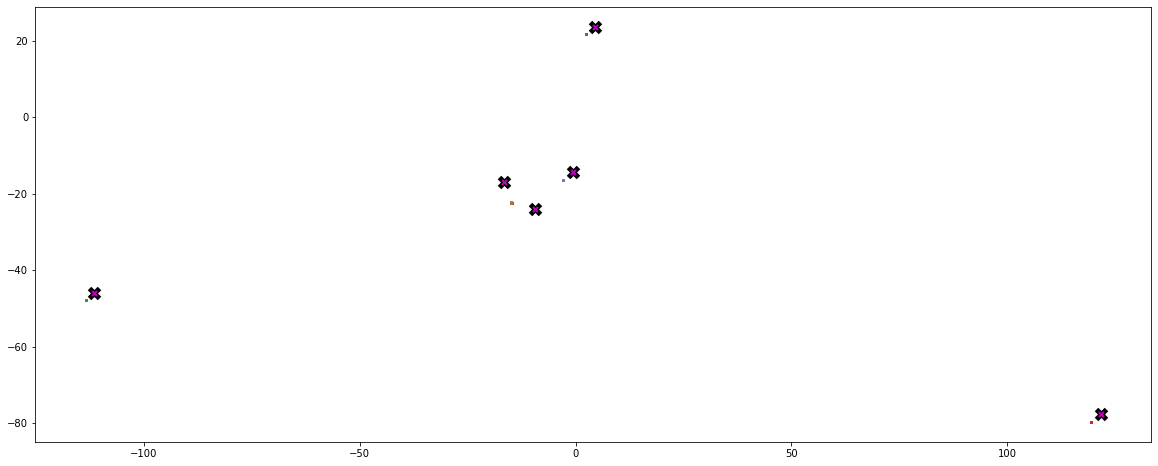

In [525]:
plot_data(centroids+2, X, num_samples)

In [533]:
def do_one(d):
    if d:
        one_update(X)
    ax.clear()
    plot_data(centroids+2, X, num_samples, ax=ax)

In [539]:
X = data.clone()
fig,ax = plt.subplots(figsize=(20, 8))
ani = FuncAnimation(fig, do_one, frames=20, interval=300, repeat=False)
plt.close()
HTML(ani.to_jshtml())